In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib in line

# READING DATA :

In [3]:
# Reading  testdata datasets
test_data = pd.read_csv("test_features.csv")
test_data

sig_id      cp_type  cp_time cp_dose     g-0     g-1     g-2  \
0     id_0004d9e33       trt_cp       24      D1 -0.5458  0.1306 -0.5135   
1     id_001897cda       trt_cp       72      D1 -0.1829  0.2320  1.2080   
2     id_002429b5b  ctl_vehicle       24      D1  0.1852 -0.1404 -0.3911   
3     id_00276f245       trt_cp       24      D2  0.4828  0.1955  0.3825   
4     id_0027f1083       trt_cp       48      D1 -0.3979 -1.2680  1.9130   
...            ...          ...      ...     ...     ...     ...     ...   
3977  id_ff7004b87       trt_cp       24      D1  0.4571 -0.5743  3.3930   
3978  id_ff925dd0d       trt_cp       24      D1 -0.5885 -0.2548  2.5850   
3979  id_ffb710450       trt_cp       72      D1 -0.3985 -0.1554  0.2677   
3980  id_ffbb869f2       trt_cp       48      D2 -1.0960 -1.7750 -0.3977   
3981  id_ffd5800b6       trt_cp       72      D1 -0.5174  0.2953  0.3286   

         g-3     g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94  \
0     0.4408  1.5500 -0.1644  ...  0.0981  0.7978 -0.1430 -0.2067 -0.2303   
1    -0.4522 -0.3652 -0.3319  ... -0.1190 -0.1852 -1.0310 -1.3670 -0.3690   
2     0.1310 -1.4380  0.2455  ... -0.2261  0.3370 -1.3840  0.8604 -1.9530   
3     0.4244 -0.5855 -1.2020  ...  0.1260  0.1570 -0.1784 -1.1200 -0.4325   
4     0.2057 -0.5864 -0.0166  ...  0.4965  0.7578 -0.1580  1.0510  0.5742   
...      ...     ...     ...  ...     ...     ...     ...     ...     ...   
3977 -0.6202  0.8557  1.6240  ... -1.1790 -0.6422 -0.4367  0.0159 -0.6539   
3978  0.3456  0.4401  0.3107  ...  0.0210  0.5780 -0.5888  0.8057  0.9312   
3979 -0.6813  0.0152  0.4791  ...  0.4418  0.9153 -0.1862  0.4049  0.9568   
3980  1.0160 -1.3350 -0.2207  ...  0.3079 -0.4473 -0.8192  0.7785  0.3133   
3981 -0.0428 -0.0800  0.8702  ...  0.0363  0.1708  0.5939 -0.0507  0.2811   

        c-95    c-96    c-97    c-98    c-99  
0    -0.1193  0.0210 -0.0502  0.1510 -0.7750  
1    -0.5382  0.0359 -0.4764 -1.3810 -0.7300  
2    -1.0140  0.8662  1.0160  0.4924 -0.1942  
3    -0.9005  0.8131 -0.1305  0.5645 -0.5809  
4     1.0900 -0.2962 -0.5313  0.9931  1.8380  
...      ...     ...     ...     ...     ...  
3977 -0.4791 -1.2680 -1.1280 -0.4167 -0.6600  
3978  1.2730  0.2614 -0.2790 -0.0131 -0.0934  
3979  0.4666  0.0461  0.5888 -0.4205 -0.1504  
3980  0.1286 -0.2618  0.5074  0.7430 -0.0484  
3981 -0.4041 -0.4948  0.0757 -0.1356  0.5280  

[3982 rows x 876 columns]

In [4]:
# Reading  traindata datasets
train_data = pd.read_csv("train_features.csv")
train_data

sig_id      cp_type  cp_time cp_dose     g-0     g-1     g-2  \
0      id_000644bb2       trt_cp       24      D1  1.0620  0.5577 -0.2479   
1      id_000779bfc       trt_cp       72      D1  0.0743  0.4087  0.2991   
2      id_000a6266a       trt_cp       48      D1  0.6280  0.5817  1.5540   
3      id_0015fd391       trt_cp       48      D1 -0.5138 -0.2491 -0.2656   
4      id_001626bd3       trt_cp       72      D2 -0.3254 -0.4009  0.9700   
...             ...          ...      ...     ...     ...     ...     ...   
23809  id_fffb1ceed       trt_cp       24      D2  0.1394 -0.0636 -0.1112   
23810  id_fffb70c0c       trt_cp       24      D2 -1.3260  0.3478 -0.3743   
23811  id_fffc1c3f4  ctl_vehicle       48      D2  0.3942  0.3756  0.3109   
23812  id_fffcb9e7c       trt_cp       24      D1  0.6660  0.2324  0.4392   
23813  id_ffffdd77b       trt_cp       72      D1 -0.8598  1.0240 -0.1361   

          g-3     g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94  \
0     -0.6208 -0.1944 -1.0120  ...  0.2862  0.2584  0.8076  0.5523 -0.1912   
1      0.0604  1.0190  0.5207  ... -0.4265  0.7543  0.4708  0.0230  0.2957   
2     -0.0764 -0.0323  1.2390  ... -0.7250 -0.6297  0.6103  0.0223 -1.3240   
3      0.5288  4.0620 -0.8095  ... -2.0990 -0.6441 -5.6300 -1.3780 -0.8632   
4      0.6919  1.4180 -0.8244  ...  0.0042  0.0048  0.6670  1.0690  0.5523   
...       ...     ...     ...  ...     ...     ...     ...     ...     ...   
23809 -0.5080 -0.4713  0.7201  ...  0.1969  0.0262 -0.8121  0.3434  0.5372   
23810  0.9905 -0.7178  0.6621  ...  0.4286  0.4426  0.0423 -0.3195 -0.8086   
23811 -0.7389  0.5505 -0.0159  ...  0.5409  0.3755  0.7343  0.2807  0.4116   
23812  0.2044  0.8531 -0.0343  ... -0.1105  0.4258 -0.2012  0.1506  1.5230   
23813  0.7952 -0.3611 -3.6750  ... -3.3890 -1.7450 -6.6300 -4.0950 -7.3860   

         c-95    c-96    c-97    c-98    c-99  
0      0.6584 -0.3981  0.2139  0.3801  0.4176  
1      0.4899  0.1522  0.1241  0.6077  0.7371  
2     -0.3174 -0.6417 -0.2187 -1.4080  0.6931  
3     -1.2880 -1.6210 -0.8784 -0.3876 -0.8154  
4     -0.3031  0.1094  0.2885 -0.3786  0.7125  
...       ...     ...     ...     ...     ...  
23809 -0.3246  0.0631  0.9171  0.5258  0.4680  
23810 -0.9798 -0.2084 -0.1224 -0.2715  0.3689  
23811  0.6422  0.2256  0.7592  0.6656  0.3808  
23812  0.7101  0.1732  0.7015 -0.6290  0.0740  
23813 -1.4160 -3.5770 -0.4775 -2.1500 -4.2520  

[23814 rows x 876 columns]

In [5]:
#Target variables
# Reading  targetdata datasets
target_data = pd.read_csv("train_targets_scored.csv")
target_data

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0      id_000644bb2                            0                       0   
1      id_000779bfc                            0                       0   
2      id_000a6266a                            0                       0   
3      id_0015fd391                            0                       0   
4      id_001626bd3                            0                       0   
...             ...                          ...                     ...   
23809  id_fffb1ceed                            0                       0   
23810  id_fffb70c0c                            0                       0   
23811  id_fffc1c3f4                            0                       0   
23812  id_fffcb9e7c                            0                       0   
23813  id_ffffdd77b                            0                       0   

       acat_inhibitor  acetylcholine_receptor_agonist  \
0                   0                               0   
1                   0                               0   
2                   0                               0   
3                   0                               0   
4                   0                               0   
...               ...                             ...   
23809               0                               0   
23810               0                               0   
23811               0                               0   
23812               0                               0   
23813               0                               0   

       acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   
...                                  ...                             ...   
23809                                  0                               0   
23810                                  0                               0   
23811                                  0                               0   
23812                                  0                               0   
23813                                  0                               0   

       adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   
...                           ...                            ...   
23809                           0                              0   
23810                           0                              0   
23811                           0                              0   
23812                           0                              0   
23813                           0                              0   

       adenylyl_cyclase_activator  ...  tropomyosin_receptor_kinase_inhibitor  \
0                               0  ...                                      0   
1                               0  ...                                      0   
2                               0  ...                                      0   
3                               0  ...                                      0   
4                               0  ...                                      0   
...                           ...  ...                                    ...   
23809                           0  ...                                      0   
23810                           0  ..

# EXPLORATORY DATA ANALYSIS :
    
Features:
sig_id - It is the drug ID for each drug

cp_type - Represents two categories, trt_cp is the one which has mechanism of action and ctl_vehicle is simply placebo and has no mechanism of action

cp_time - Represents three categories of duration of treatment i.e 24, 48, 72 hours.

cp_dose - Represents two categories ie High dose and low dose 

g - Signifies gene expression data

c - Signifies cell viablity data

In [6]:
#Exploratory data analysis
train_data.shape

(23814, 876)

In [7]:
train_data.describe()

cp_time           g-0           g-1           g-2           g-3  \
count  23814.000000  23814.000000  23814.000000  23814.000000  23814.000000   
mean      48.020156      0.248366     -0.095684      0.152253      0.081971   
std       19.402807      1.393399      0.812363      1.035731      0.950012   
min       24.000000     -5.513000     -5.737000     -9.104000     -5.998000   
25%       24.000000     -0.473075     -0.562200     -0.437750     -0.429575   
50%       48.000000     -0.008850     -0.046600      0.075200      0.008050   
75%       72.000000      0.525700      0.403075      0.663925      0.463400   
max       72.000000     10.000000      5.039000      8.257000     10.000000   

                g-4           g-5           g-6           g-7           g-8  \
count  23814.000000  23814.000000  23814.000000  23814.000000  23814.000000   
mean       0.057347     -0.138836      0.035961     -0.202651     -0.190083   
std        1.032091      1.179388      0.882395      1.125494      1.749885   
min       -6.369000    -10.000000    -10.000000    -10.000000    -10.000000   
25%       -0.470925     -0.602225     -0.493900     -0.525175     -0.511675   
50%       -0.026900     -0.015650     -0.000650     -0.017900      0.010000   
75%        0.465375      0.510425      0.528725      0.411900      0.549225   
max       10.000000      7.282000      7.333000      5.473000      8.887000   

       ...          c-90          c-91          c-92          c-93  \
count  ...  23814.000000  23814.000000  23814.000000  23814.000000   
mean   ...     -0.469244     -0.461411     -0.513256     -0.500142   
std    ...      2.000488      2.042475      2.001714      2.107105   
min    ...    -10.000000    -10.000000    -10.000000    -10.000000   
25%    ...     -0.566175     -0.565975     -0.589975     -0.568700   
50%    ...     -0.009900      0.003250     -0.009100     -0.013750   
75%    ...      0.457750      0.461500      0.445675      0.452900   
max    ...      4.069000      3.960000      3.927000      3.596000   

               c-94          c-95          c-96          c-97          c-98  \
count  23814.000000  23814.000000  23814.000000  23814.000000  23814.000000   
mean      -0.507093     -0.353726     -0.463485     -0.378241     -0.470252   
std        2.159589      1.629291      2.059725      1.703615      1.834828   
min      -10.000000    -10.000000    -10.000000    -10.000000    -10.000000   
25%       -0.563775     -0.567975     -0.552575     -0.561000     -0.592600   
50%       -0.003300     -0.010250     -0.001250     -0.006800      0.014000   
75%        0.470900      0.444750      0.465225      0.446400      0.461275   
max        3.747000      2.814000      3.505000      2.924000      3.111000   

               c-99  
count  23814.000000  
mean      -0.301505  
std        1.407918  
min      -10.000000  
25%       -0.562900  
50%       -0.019500  
75%        0.438650  
max        3.805000  

[8 rows x 873 columns]

In [8]:
test_data.shape

(3982, 876)

In [9]:
test_data.describe()

cp_time          g-0          g-1          g-2          g-3  \
count  3982.000000  3982.000000  3982.000000  3982.000000  3982.000000   
mean     48.030136     0.197471    -0.063233     0.137516     0.049622   
std      19.414155     1.373476     0.800573     1.066475     0.949972   
min      24.000000    -5.321000    -4.142000    -6.996000    -3.765000   
25%      24.000000    -0.502725    -0.552975    -0.431800    -0.465350   
50%      48.000000    -0.060700    -0.027500     0.073400    -0.036450   
75%      72.000000     0.454650     0.429950     0.641125     0.423150   
max      72.000000    10.000000     4.536000     8.227000    10.000000   

               g-4          g-5          g-6          g-7          g-8  ...  \
count  3982.000000  3982.000000  3982.000000  3982.000000  3982.000000  ...   
mean      0.052434    -0.147852     0.010424    -0.166886    -0.168069  ...   
std       0.994018     1.204934     0.859452     1.088335     1.666240  ...   
min      -6.312000    -8.717000    -6.037000    -8.833000   -10.000000  ...   
25%      -0.445750    -0.576000    -0.521325    -0.477400    -0.526925  ...   
50%      -0.047800    -0.012500    -0.009200     0.002150    -0.002900  ...   
75%       0.436050     0.498950     0.495975     0.422500     0.518050  ...   
max       7.615000     6.356000     6.190000     2.995000     8.007000  ...   

              c-90         c-91         c-92         c-93         c-94  \
count  3982.000000  3982.000000  3982.000000  3982.000000  3982.000000   
mean     -0.429980    -0.413215    -0.475762    -0.462484    -0.479196   
std       2.013142     1.995433     1.963440     2.128477     2.149705   
min     -10.000000   -10.000000   -10.000000   -10.000000   -10.000000   
25%      -0.527725    -0.521850    -0.539375    -0.540450    -0.548175   
50%       0.010050     0.010900     0.006550     0.017500     0.013450   
75%       0.478900     0.479625     0.442550     0.473300     0.487825   
max       4.936000     5.300000     3.268000     4.087000     5.290000   

              c-95         c-96         c-97         c-98         c-99  
count  3982.000000  3982.000000  3982.000000  3982.000000  3982.000000  
mean     -0.346450    -0.423905    -0.316387    -0.404859    -0.269792  
std       1.645669     2.086895     1.655524     1.790883     1.355936  
min     -10.000000   -10.000000   -10.000000   -10.000000   -10.000000  
25%      -0.561525    -0.497050    -0.521125    -0.531075    -0.541950  
50%      -0.020000     0.043800     0.020450     0.030750    -0.006250  
75%       0.454400     0.501050     0.478925     0.487000     0.422800  
max       5.053000     5.276000     3.074000     3.859000     4.149000  

[8 rows x 873 columns]

In [10]:
target_data.shape

(23814, 207)

In [11]:
target_data.describe()

5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  acat_inhibitor  \
count                 23814.000000            23814.000000    23814.000000   
mean                      0.000714                0.000756        0.001008   
std                       0.026709                0.027483        0.031731   
min                       0.000000                0.000000        0.000000   
25%                       0.000000                0.000000        0.000000   
50%                       0.000000                0.000000        0.000000   
75%                       0.000000                0.000000        0.000000   
max                       1.000000                1.000000        1.000000   

       acetylcholine_receptor_agonist  acetylcholine_receptor_antagonist  \
count                    23814.000000                       23814.000000   
mean                         0.007979                           0.012640   
std                          0.088967                           0.111716   
min                          0.000000                           0.000000   
25%                          0.000000                           0.000000   
50%                          0.000000                           0.000000   
75%                          0.000000                           0.000000   
max                          1.000000                           1.000000   

       acetylcholinesterase_inhibitor  adenosine_receptor_agonist  \
count                    23814.000000                23814.000000   
mean                         0.003065                    0.002268   
std                          0.055283                    0.047566   
min                          0.000000                    0.000000   
25%                          0.000000                    0.000000   
50%                          0.000000                    0.000000   
75%                          0.000000                    0.000000   
max                          1.000000                    1.000000   

       adenosine_receptor_antagonist  adenylyl_cyclase_activator  \
count                   23814.000000                23814.000000   
mean                        0.004031                    0.000504   
std                         0.063365                    0.022443   
min                         0.000000                    0.000000   
25%                         0.000000                    0.000000   
50%                         0.000000                    0.000000   
75%                         0.000000                    0.000000   
max                         1.000000                    1.000000   

       adrenergic_receptor_agonist  ...  \
count                 23814.000000  ...   
mean                      0.011338  ...   
std                       0.105876  ...   
min                       0.000000  ...   
25%                       0.000000  ...   
50%                       0.000000  ...   
75%                       0.000000  ...   
max                       1.000000  ...   

       tropomyosin_receptor_kinase_inhibitor  trpv_agonist  trpv_antagonist  \
count                           23814.000000  23814.000000     23814.000000   
mean                                0.000252      0.001050         0.002016   
std                                 0.015871      0.032384         0.044851   
min                                 0.000000      0.000000         0.000000   
25%                                 0.000000      0.000000         0.000000   
50%                                 0.000000      0.000000         0.000000   
75%                                 0.000000      0.000000         0.000000   
max                                 1.000000      1.000000         1.000000   

       tubulin_inhibitor  tyrosine_kinase_inhibitor  \
count       23814.000000               23814.000000   
mean            0.013270                   0.003065   
std             0.114429                   0.055283   
min             0.000000                   0.000000   
25%      

In [12]:
# Missing values in both test and train data

missing_value_train =print(train_data.isnull().sum().sum())
missing_value_test = print(test_data.isnull().sum().sum())
missing_value_target = print(target_data.isnull().sum().sum())
print(" Train , Test and Target files have no missing values")

0
0
0
 Train , Test and Target files have no missing values


# Train features:
 
There are three categorical features in train data i.e cp_type, cp_time, cp_dose


C:\Users\16476\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


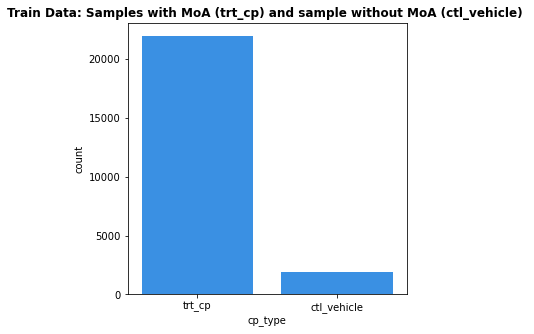

In [13]:
# cp_type
train_data.cp_type.astype("category")
plt.figure(figsize=(5,5))
sns.set_palette("tab20")
sns.countplot(train_data['cp_type'], color='dodgerblue')
plt.title("Train Data: Samples with MoA (trt_cp) and sample without MoA (ctl_vehicle) ", fontsize=12, weight='bold')
plt.show()


As we can see that cp_type is imbalanced whith high number of trt_cp, which is expected since it has MoA.As we know ctl_ vehcicle has no MoA, so it will of no use to us and we will discard it from our dataset for our further analysis

In [14]:
# remove ctl_vehicle from train data
train_data= train_data.drop(train_data[train_data.cp_type == "ctl_vehicle"].index)
train_data

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1      id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2      id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3      id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4      id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   
...             ...     ...      ...     ...     ...     ...     ...     ...   
23808  id_fff8c2444  trt_cp       72      D1  0.1608 -1.0500  0.2551 -0.2239   
23809  id_fffb1ceed  trt_cp       24      D2  0.1394 -0.0636 -0.1112 -0.5080   
23810  id_fffb70c0c  trt_cp       24      D2 -1.3260  0.3478 -0.3743  0.9905   
23812  id_fffcb9e7c  trt_cp       24      D1  0.6660  0.2324  0.4392  0.2044   
23813  id_ffffdd77b  trt_cp       72      D1 -0.8598  1.0240 -0.1361  0.7952   

          g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94    c-95  \
0     -0.1944 -1.0120  ...  0.2862  0.2584  0.8076  0.5523 -0.1912  0.6584   
1      1.0190  0.5207  ... -0.4265  0.7543  0.4708  0.0230  0.2957  0.4899   
2     -0.0323  1.2390  ... -0.7250 -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3      4.0620 -0.8095  ... -2.0990 -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4      1.4180 -0.8244  ...  0.0042  0.0048  0.6670  1.0690  0.5523 -0.3031   
...       ...     ...  ...     ...     ...     ...     ...     ...     ...   
23808 -0.2431  0.4256  ...  0.0789  0.3538  0.0558  0.3377 -0.4753 -0.2504   
23809 -0.4713  0.7201  ...  0.1969  0.0262 -0.8121  0.3434  0.5372 -0.3246   
23810 -0.7178  0.6621  ...  0.4286  0.4426  0.0423 -0.3195 -0.8086 -0.9798   
23812  0.8531 -0.0343  ... -0.1105  0.4258 -0.2012  0.1506  1.5230  0.7101   
23813 -0.3611 -3.6750  ... -3.3890 -1.7450 -6.6300 -4.0950 -7.3860 -1.4160   

         c-96    c-97    c-98    c-99  
0     -0.3981  0.2139  0.3801  0.4176  
1      0.1522  0.1241  0.6077  0.7371  
2     -0.6417 -0.2187 -1.4080  0.6931  
3     -1.6210 -0.8784 -0.3876 -0.8154  
4      0.1094  0.2885 -0.3786  0.7125  
...       ...     ...     ...     ...  
23808 -0.7415  0.8413 -0.4259  0.2434  
23809  0.0631  0.9171  0.5258  0.4680  
23810 -0.2084 -0.1224 -0.2715  0.3689  
23812  0.1732  0.7015 -0.6290  0.0740  
23813 -3.5770 -0.4775 -2.1500 -4.2520  

[21948 rows x 876 columns]

C:\Users\16476\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


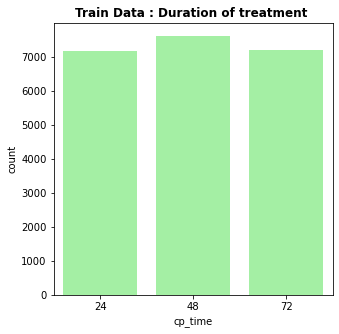

In [15]:
#cp_time
train_data.cp_time.astype("category")
plt.figure(figsize=(5,5))
sns.set_palette("tab20")
sns.countplot(train_data['cp_time'], color='palegreen')
plt.title("Train Data : Duration of treatment ", fontsize=12, weight='bold')
plt.show()
# Treatment durations are pretty balanced for our dataset

C:\Users\16476\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


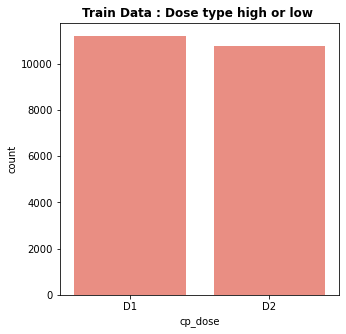

In [16]:
#cp_dose
train_data.cp_dose.astype("category")
plt.figure(figsize=(5,5))
sns.set_palette("tab20")
sns.countplot(train_data['cp_dose'], color='salmon')
plt.title("Train Data : Dose type high or low ", fontsize=12, weight='bold')
plt.show()
#Dose type are pretty balanced and evenly distributed for our dataset

# Distribution of Genes :

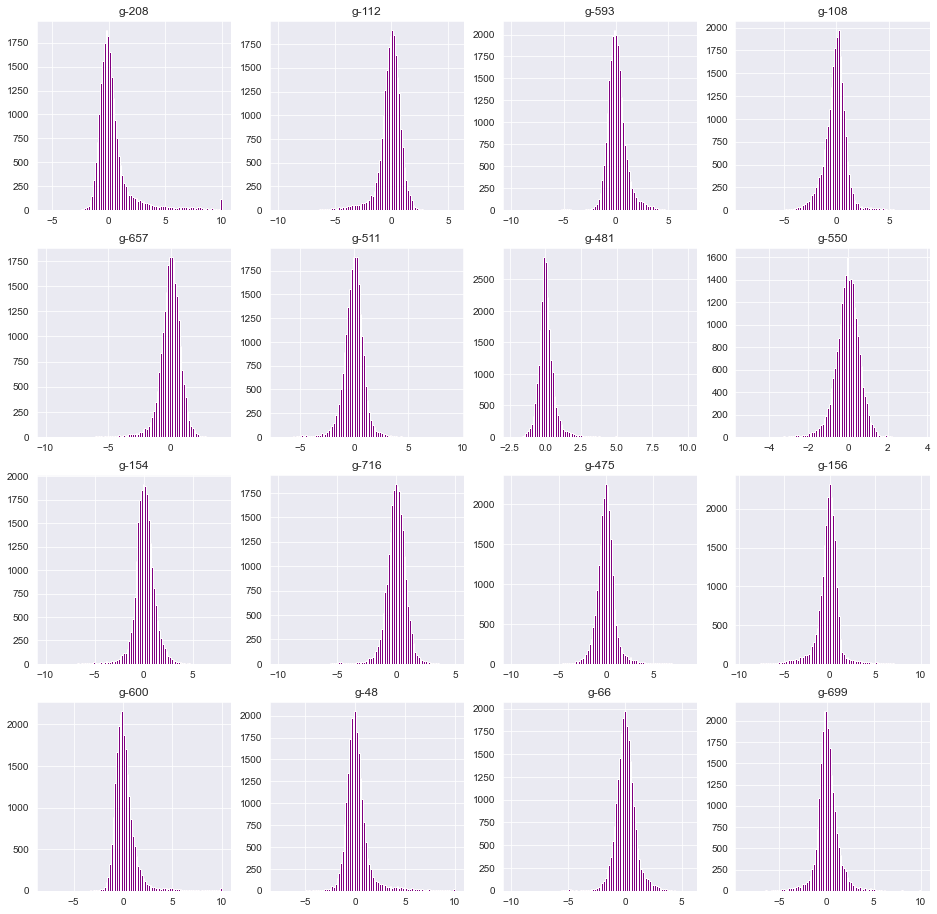

In [17]:
gene = [g for g in train_data.columns if g.startswith("g-")]
plt.figure(figsize=(16,16))
sns.set_style('darkgrid')
gene_distribution =np.random.choice(len(gene),16)
for i,col in enumerate(gene_distribution):
    plt.subplot(4,4,i+1)
    plt.hist(train_data.loc[:,gene[col]],bins=100,color="purple")
    plt.title(gene[col])

From above data we can see that the range for -10 to 10. Negative value indicates gene supression and positive value indicates gene expression

# Distribution of cell viablity:

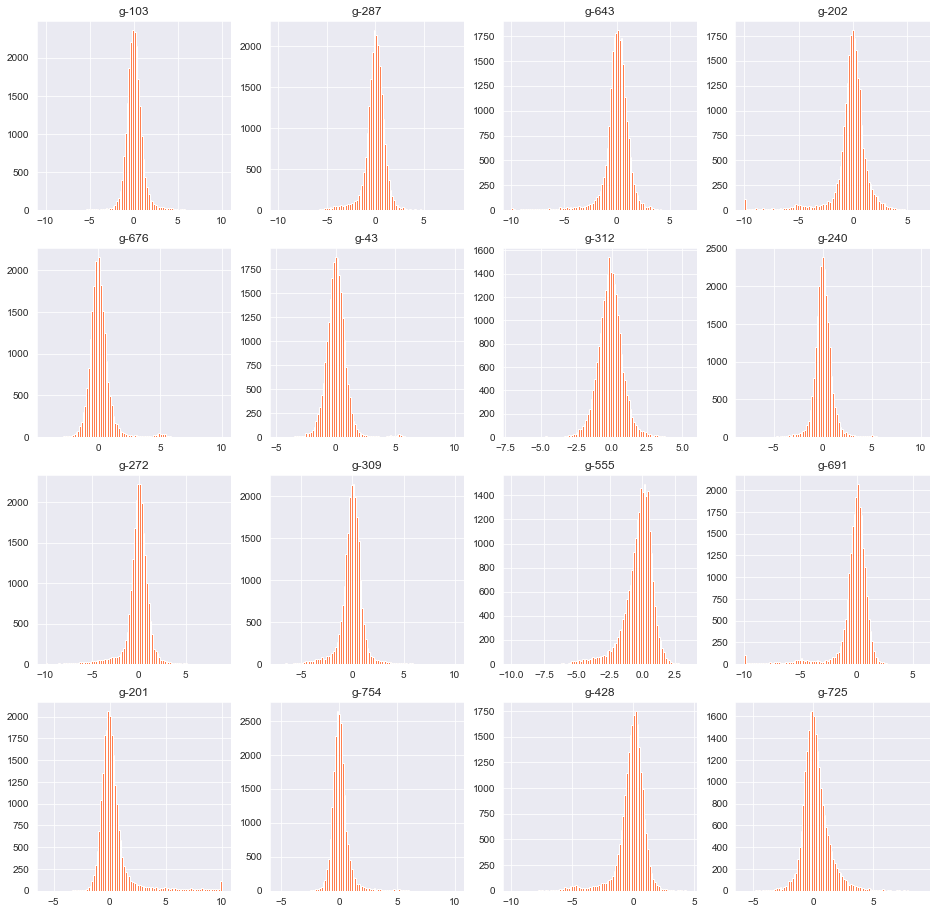

In [18]:
cells = [c for c in train_data.columns if c.startswith("c-")]
plt.figure(figsize=(16,16))
sns.set_style('darkgrid')
gene_distribution =np.random.choice(len(gene),16)
for i,col in enumerate(gene_distribution):
    plt.subplot(4,4,i+1)
    plt.hist(train_data.loc[:,gene[col]],bins=100,color="coral")
    plt.title(gene[col])

From above data we can see that the range for -10 to 10. Negative value indicates dead cells and positive value indicates living cells

# Effect of cp_time and cp_dose on gene and cell viablity data

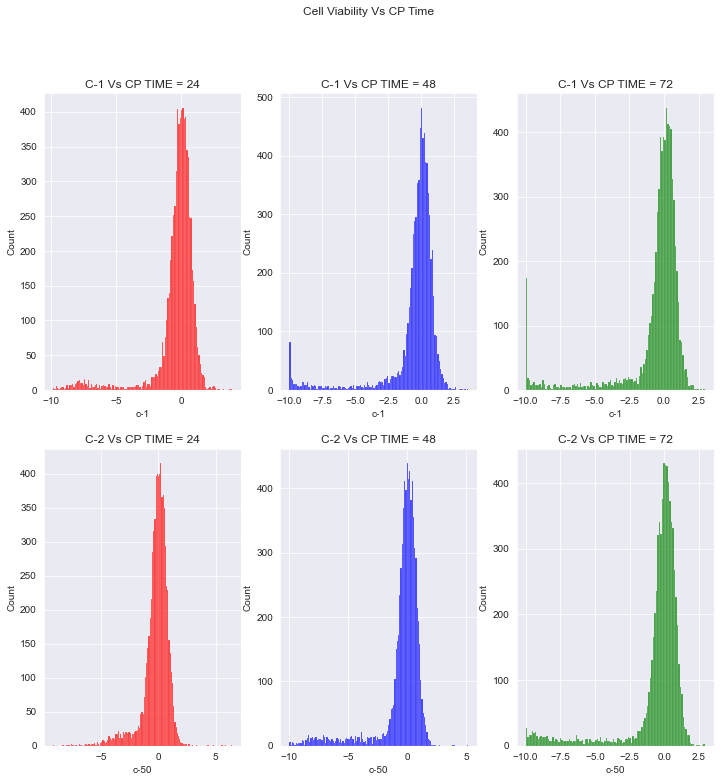

In [19]:
# Effect of cp_time on  random cell viablity
plt.figure(figsize = (12,12))

plt.subplot(2,3,1)
c_1 = train_data[["c-1","cp_time"]]
c_1_24 = c_1[c_1["cp_time"]==24]
sns.histplot(c_1_24["c-1"],color = "red")
plt.title("C-1 Vs CP TIME = 24")

plt.subplot(2,3,2)
c_1_48 = c_1[c_1["cp_time"]==48]
sns.histplot(c_1_48["c-1"],color = "blue")
plt.title("C-1 Vs CP TIME = 48")


plt.subplot(2,3,3)
c_1_72 = c_1[c_1["cp_time"]==72]
sns.histplot(c_1_72["c-1"],color = "green")
plt.title("C-1 Vs CP TIME = 72")

plt.subplot(2,3,4)
c_2 = train_data[["c-50","cp_time"]]
c_2_24 = c_2[c_2["cp_time"]==24]
sns.histplot(c_2_24["c-50"],color = "red")
plt.title("C-2 Vs CP TIME = 24")

plt.subplot(2,3,5)
c_2_48 = c_2[c_2["cp_time"]==48]
sns.histplot(c_2_48["c-50"],color = "blue")
plt.title("C-2 Vs CP TIME = 48")


plt.subplot(2,3,6)
c_2_72 = c_2[c_2["cp_time"]==72]
sns.histplot(c_2_72["c-50"],color = "green")
plt.title("C-2 Vs CP TIME = 72")

plt.suptitle("Cell Viability Vs CP Time")

plt.show()



We can say from above graph that there is an increase in negative cell viablity as the time duration increases.

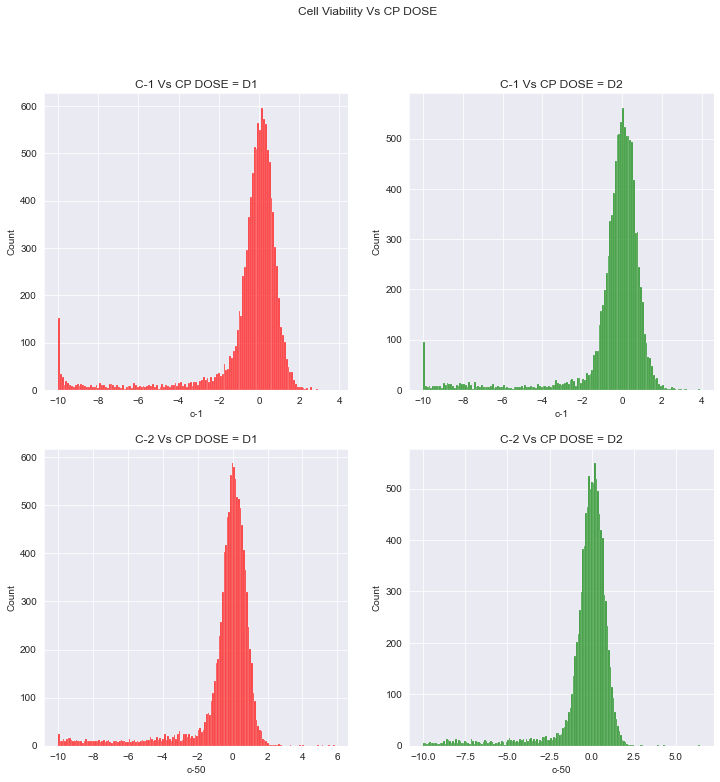

In [20]:
# Effect of cp_dose on  randomcell viablity
plt.figure(figsize = (12,12))

plt.subplot(2,2,1)
c_1 = train_data[["c-1","cp_dose"]]
c_1_D1 = c_1[c_1["cp_dose"]=="D1"]
sns.histplot(c_1_D1["c-1"],color = "red")
plt.title("C-1 Vs CP DOSE = D1")

plt.subplot(2,2,2)
c_1_D2 = c_1[c_1["cp_dose"]=="D2"]
sns.histplot(c_1_D2["c-1"],color = "green")
plt.title("C-1 Vs CP DOSE = D2")

plt.subplot(2,2,3)
c_2 = train_data[["c-50","cp_dose"]]
c_2_D2 = c_2[c_2["cp_dose"]=="D1"]
sns.histplot(c_2_D2["c-50"],color = "red")
plt.title("C-2 Vs CP DOSE = D1")

plt.subplot(2,2,4)
c_2_D2 = c_2[c_2["cp_dose"]=="D2"]
sns.histplot(c_2_D2["c-50"],color = "green")
plt.title("C-2 Vs CP DOSE = D2")

plt.suptitle("Cell Viability Vs CP DOSE")

plt.show()

In [ ]:
Higher dose has marginally more negative cell viablity than lower dose.

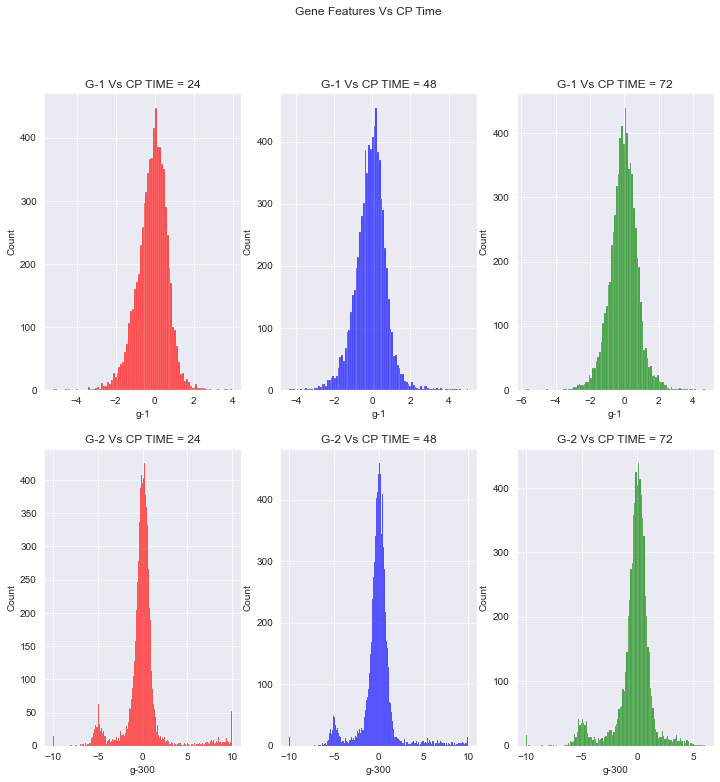

In [21]:
## Effect of cp_time on  random Gene data
plt.figure(figsize = (12,12))

plt.subplot(2,3,1)
g_1 = train_data[["g-1","cp_time"]]
g_1_24 = g_1[g_1["cp_time"]==24]
sns.histplot(g_1_24["g-1"],color = "red")
plt.title("G-1 Vs CP TIME = 24")

plt.subplot(2,3,2)
g_1_48 = g_1[g_1["cp_time"]==48]
sns.histplot(g_1_48["g-1"],color = "blue")
plt.title("G-1 Vs CP TIME = 48")


plt.subplot(2,3,3)
g_1_72 = g_1[g_1["cp_time"]==72]
sns.histplot(g_1_72["g-1"],color = "green")
plt.title("G-1 Vs CP TIME = 72")

plt.subplot(2,3,4)
g_2 = train_data[["g-300","cp_time"]]
g_2_24 = g_2[g_2["cp_time"]==24]
sns.histplot(g_2_24["g-300"],color = "red")
plt.title("G-2 Vs CP TIME = 24")

plt.subplot(2,3,5)
g_2_48 = g_2[g_2["cp_time"]==48]
sns.histplot(g_2_48["g-300"],color = "blue")
plt.title("G-2 Vs CP TIME = 48")


plt.subplot(2,3,6)
g_2_72 = g_2[g_2["cp_time"]==72]
sns.histplot(g_2_72["g-300"],color = "green")
plt.title("G-2 Vs CP TIME = 72")

plt.suptitle("Gene Features Vs CP Time")

plt.show()

We can say from above graph that there is an increase in negative Gene expression as the time duration increases. Which was also true in cell viablity case.

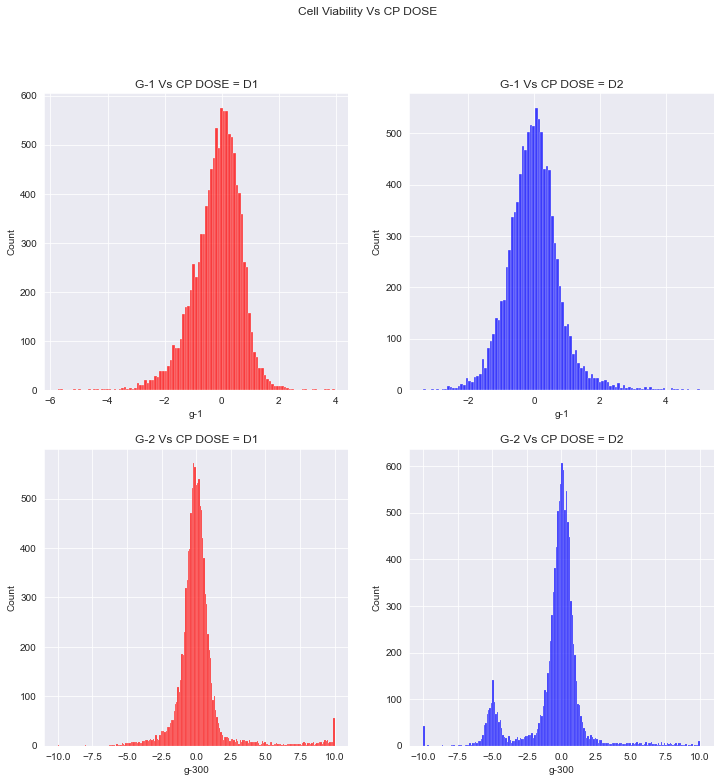

In [22]:
# Effect of cp_dose on random Gene data
plt.figure(figsize = (12,12))

plt.subplot(2,2,1)
g_1 = train_data[["g-1","cp_dose"]]
g_1_D1 = g_1[g_1["cp_dose"]=="D1"]
sns.histplot(g_1_D1["g-1"],color = "red")
plt.title("G-1 Vs CP DOSE = D1")

plt.subplot(2,2,2)
g_1_D2 = g_1[g_1["cp_dose"]=="D2"]
sns.histplot(g_1_D2["g-1"],color = "blue")
plt.title("G-1 Vs CP DOSE = D2")

plt.subplot(2,2,3)
g_2 = train_data[["g-300","cp_dose"]]
g_2_D1 = g_2[g_2["cp_dose"]=="D1"]
sns.histplot(g_2_D1["g-300"],color = "red")
plt.title("G-2 Vs CP DOSE = D1")

plt.subplot(2,2,4)
g_2_D2 = g_2[g_2["cp_dose"]=="D2"]
sns.histplot(g_2_D2["g-300"],color = "blue")
plt.title("G-2 Vs CP DOSE = D2")

plt.suptitle("Cell Viability Vs CP DOSE")

plt.show()

Higher dose shows more gene expression on both negative side and positive side.

# Correlations

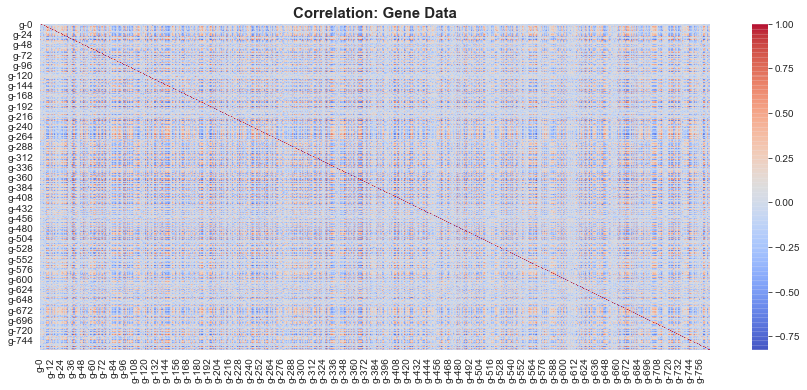

In [23]:
# Correlations between genes

gene = train_data.iloc[1:3624 ,4:771]
plt.figure(figsize=(15,6))
sns.heatmap(gene.corr(),cmap='coolwarm',alpha=0.75)
plt.title('Correlation: Gene Data', fontsize=15, weight='bold')
plt.show()

In [25]:
def diagonal_pairs(df):
    drop_pairs = set()
    x = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            drop_pairs.add((x[i], x[j]))
    return drop_pairs
def correlations(df,n=5):
    top_corr = df.corr().abs().unstack()
    labels_to_drop = diagonal_pairs(df)
    top_corr = top_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return top_corr[0:n]

diagonal_pairs(gene)
print(correlations(gene, 10))

g-37   g-50     0.906424
g-349  g-460    0.857138
g-50   g-489    0.851010
g-37   g-489    0.850305
g-369  g-569    0.846992
g-50   g-672    0.842562
g-248  g-460    0.840229
g-123  g-744    0.830518
g-63   g-195    0.828375
g-38   g-744    0.826617
dtype: float64


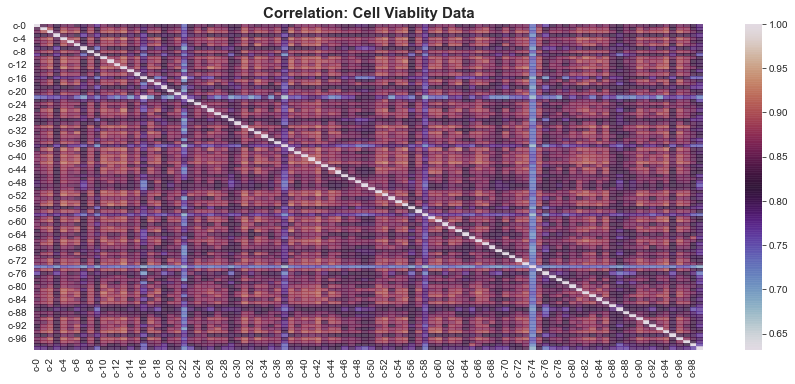

In [26]:
#Correlation between cells
cell = train_data.iloc[1:3624 ,776:876]
plt.figure(figsize=(15,6))
sns.heatmap(cell.corr(),cmap='twilight',alpha=0.75)
plt.title('Correlation: Cell Viablity Data', fontsize=15, weight='bold')
plt.show()

In [27]:
diagonal_pairs(cell)
print(correlations(cell, 10))

c-42  c-52    0.928782
c-4   c-13    0.926462
c-13  c-26    0.924563
c-4   c-42    0.924094
c-38  c-63    0.923631
c-13  c-73    0.923532
c-4   c-52    0.920889
c-2   c-38    0.920750
c-11  c-55    0.920345
c-4   c-55    0.920303
dtype: float64


As we can see from above there is higher correlation between cell viablity data than gene data

# Target variable

We have 207 MoA through which drugs are classified. A single drug can have more than one mechanism of action. 

C:\Users\16476\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


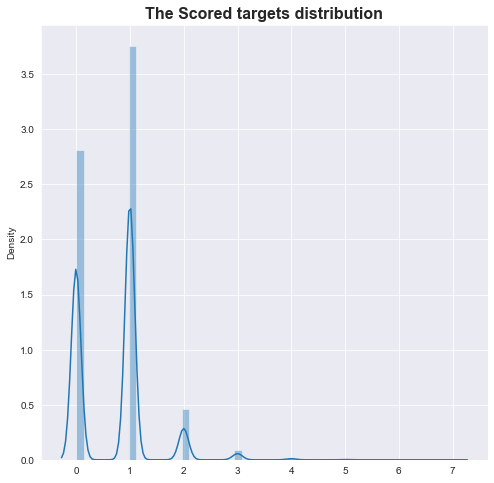

In [28]:
# Plotting distribution of target variables
plt.figure(figsize=(8,8))
sns.distplot(target_data.sum(axis=1))
plt.title("The Scored targets distribution", fontsize=16, weight='bold')
plt.show()

From the above graph we can see that most of the drugs have atleast one target site. Although some drugs have more than one target site, its very negligeble compared to "0" and "1". Also some targets are repeated more often than others. We can have a look at them in our further analysis.

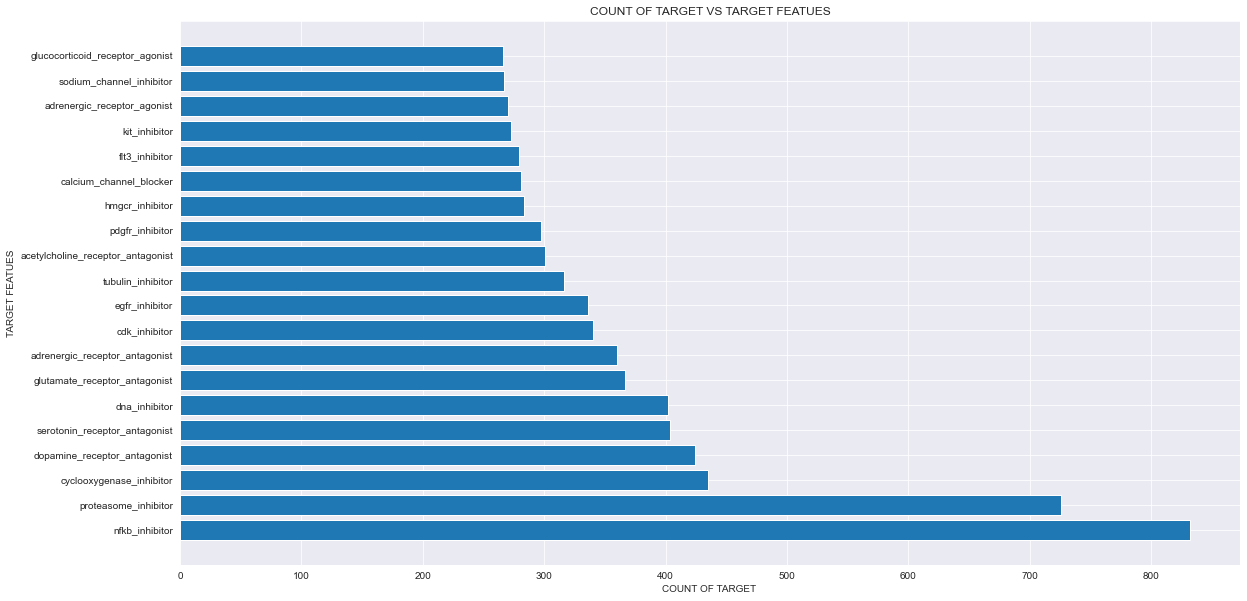

In [29]:
# Sorting targets
x_axis = list(target_data.columns.values)
sig_id_values  = x_axis[1:]
len(sig_id_values) , sig_id_values[:4]
count_of_target = target_data.iloc[:,1:].sum().values
len(count_of_target) , count_of_target[:3]
dct =dict(zip(sig_id_values, count_of_target))
sorted_dict = dict( sorted(dct.items(), key=lambda i: i[1], reverse=True))

#TOP 20 TARGETS OCCURING MORE FREQUNTLY WITH THEIR COUNTS
list(sorted_dict.items())[:20]
plt.figure(figsize=(19,10))
plt.barh(list(sorted_dict.keys())[:20], list(sorted_dict.values())[:20] )
plt.title('COUNT OF TARGET VS TARGET FEATUES')
plt.xlabel('COUNT OF TARGET ')
plt.ylabel('TARGET FEATUES')
plt.show()

We can conclude from above graph that we have two target features which have more common occurence i.e nkfb_inhibitor and proteasome_inhibitor.

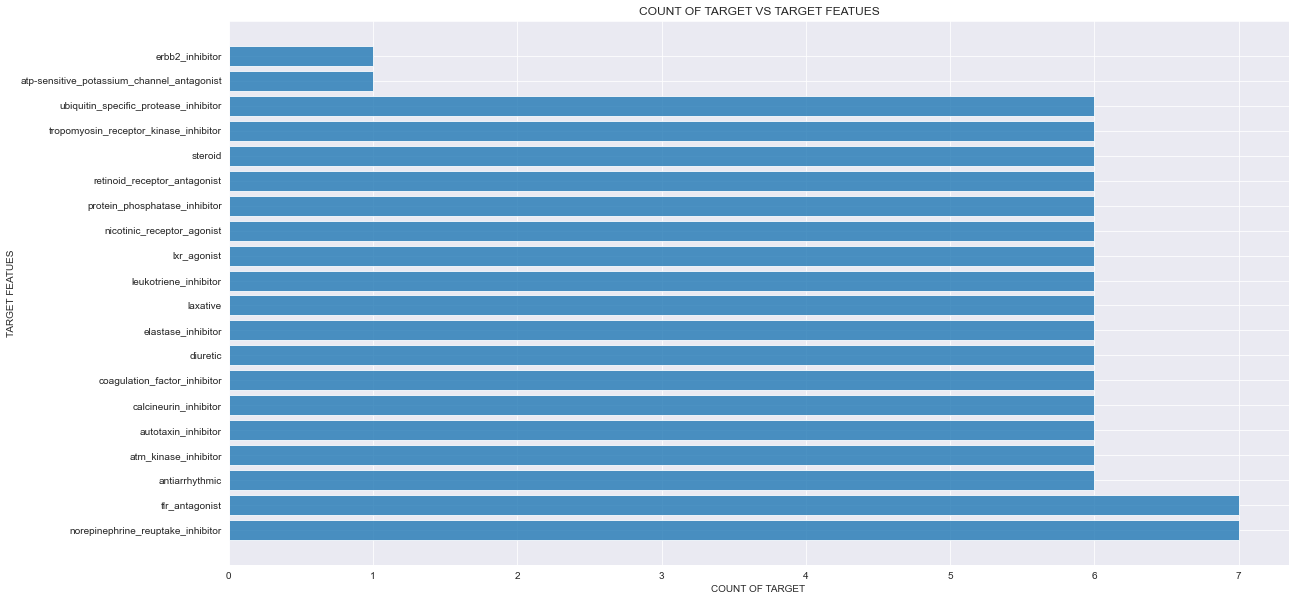

In [30]:
#LEAST 20 TARGETS OCCURING MORE FREQUNTLY WITH THEIR COUNTS
plt.figure(figsize=(19,10))
plt.barh(list(sorted_dict.keys())[-20:], list(sorted_dict.values())[-20:],alpha=0.8 )
plt.title('COUNT OF TARGET VS TARGET FEATUES')
plt.xlabel('COUNT OF TARGET ')
plt.ylabel('TARGET FEATUES')
plt.show()

We can conclude from above graph that we have two target features which have only one occurence i.e erbb2_inhibitor and atp_sensitive_pottasium_channel_antagonist.

Outliers would not be removed from the dataset since they are important observations, and give meaningful insights to the dataset.

# Correlations

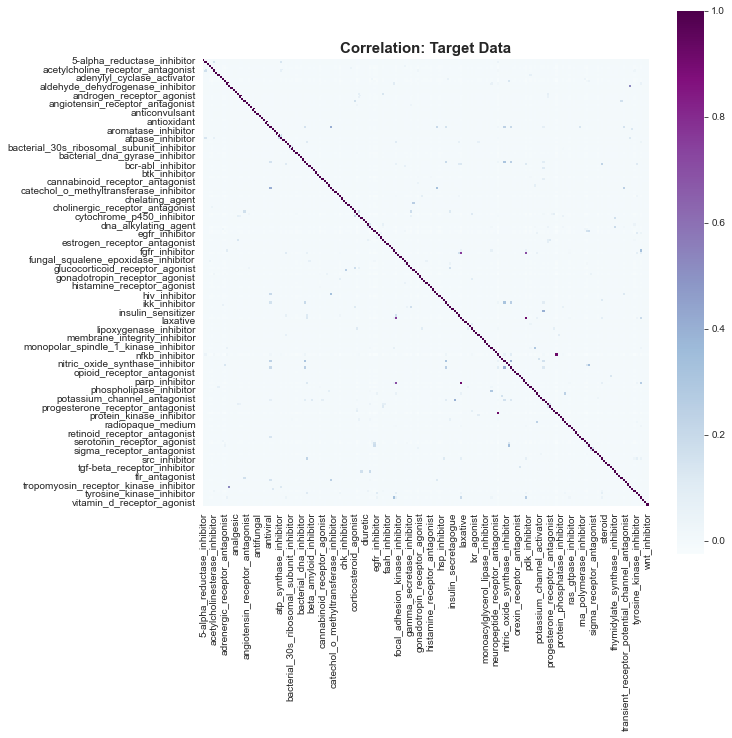

In [31]:
#Correlations within target variables
new_target_data = target_data.drop(["sig_id"], axis=1)
correlation_target= new_target_data.corr()
plt.figure(figsize= (10,10))
sns.heatmap(correlation_target, square= True,cmap=plt.cm.BuPu)
plt.title('Correlation: Target Data', fontsize=15, weight='bold')
plt.show()


There is very less correlations among the target variables.

In [32]:
diagonal_pairs(correlation_target)
print(correlations(correlation_target, 10))

kit_inhibitor                      pdgfr_inhibitor                      0.994601
nfkb_inhibitor                     proteasome_inhibitor                 0.990562
flt3_inhibitor                     kit_inhibitor                        0.951336
                                   pdgfr_inhibitor                      0.936127
aldehyde_dehydrogenase_inhibitor   trpv_agonist                         0.820699
nitric_oxide_production_inhibitor  nrf2_activator                       0.743302
insulin_sensitizer                 ppar_receptor_agonist                0.666296
apoptosis_stimulant                caspase_activator                    0.661034
ikk_inhibitor                      nitric_oxide_production_inhibitor    0.631186
bcl_inhibitor                      nitric_oxide_production_inhibitor    0.623893
dtype: float64


There are very few highly correlated pairs in target dataset.

# Correlatrion between Training data features and Target  data features

In [33]:
# Merge two data frames of train_data and target_data
new_train_data = train_data.merge(target_data, on = "sig_id")

#Removed sig_id from above dataframe
mixed_correlation = new_train_data.drop(["sig_id"], axis=1)

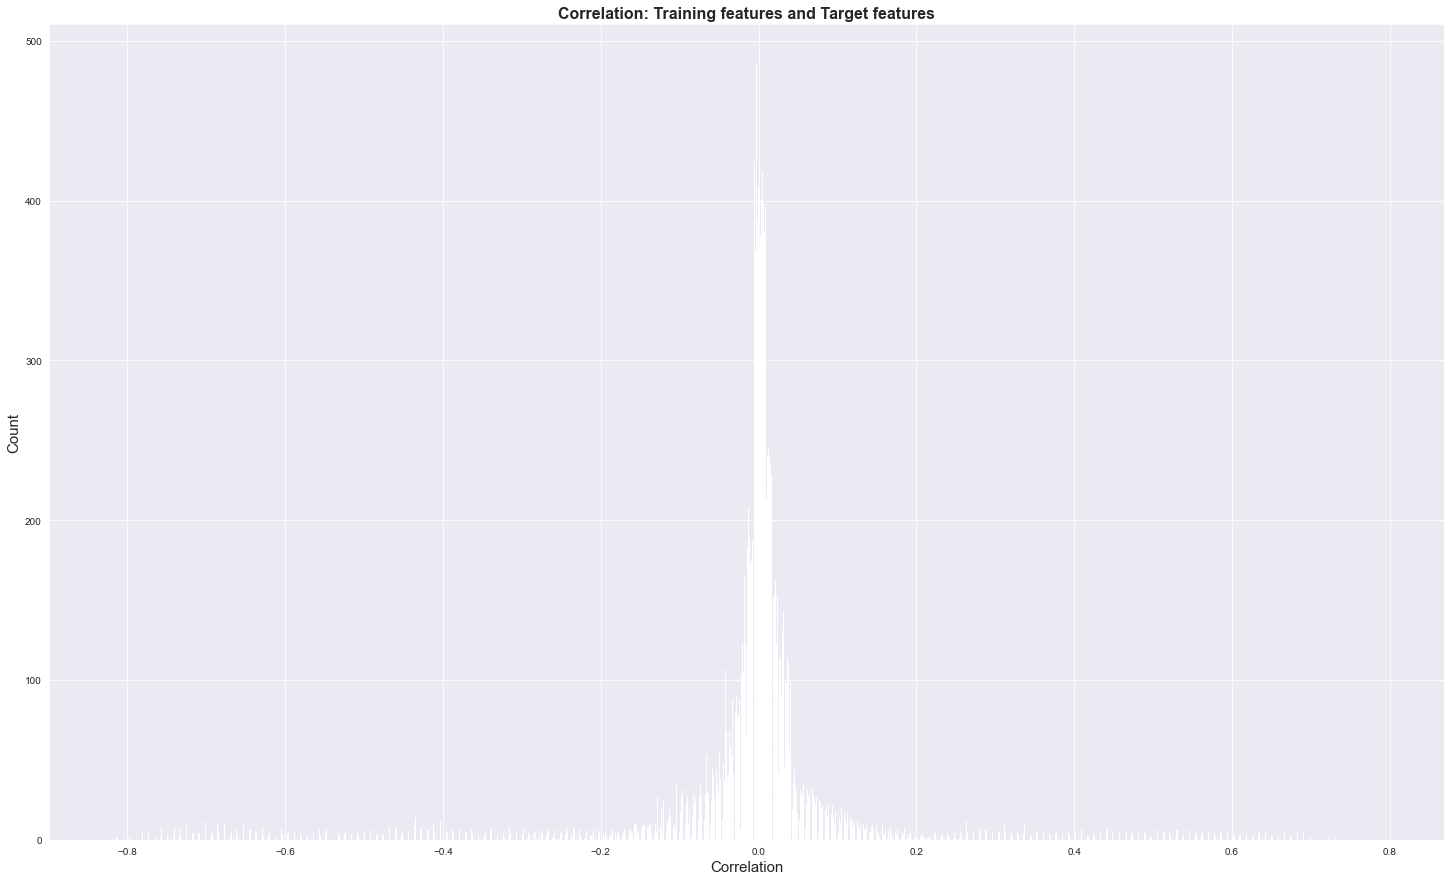

In [92]:
#correlation between train data and target features
%matplotlib inline
correlation_data= mixed_correlation.corr()
correlation_data_new =correlation_data.iloc[:875,875:]

plt.figure(figsize= (25,15))
plt.hist(correlation_data_new,bins=200)
plt.ylabel('Count',fontsize=15)
plt.xlabel('Correlation',fontsize=15)
plt.title('Correlation: Training features and Target features', fontsize=16, weight='bold')
plt.show()

The above plot  gives us  representation of correlation between Train data features and target features. We have some highly positive correlation and some highly negative correlation. Most of the data is weekly correlated, but we can sort some correlation among them in our further analysis.

In [33]:
# Highly correlated Train features and target features
sort_corr = correlation_data_new.abs().unstack()
sort_corr.sort_values(ascending = False).drop_duplicates()[:40]


proteasome_inhibitor  c-78     0.819816
                      c-32     0.804192
                      c-53     0.798831
                      c-31     0.798461
                      g-349    0.789331
                      c-16     0.789159
                      c-83     0.787470
                      c-85     0.784811
                      c-88     0.783706
                      c-44     0.782305
                      c-35     0.782141
                      c-93     0.780356
                      c-17     0.778975
                      c-90     0.774141
                      c-72     0.772406
                      c-61     0.772351
                      c-27     0.772269
                      c-68     0.770052
                      c-14     0.767815
nfkb_inhibitor        c-78     0.763313
proteasome_inhibitor  c-60     0.762756
                      c-89     0.762513
                      c-20     0.759261
                      c-96     0.759235
                      c-62     0.758731


In [34]:
 # least correlated Train features and target features
sort_corr = correlation_data_new.abs().unstack()
sort_corr.sort_values(ascending = True).drop_duplicates()[:40]


beta_amyloid_inhibitor                     g-217    3.928972e-08
acat_inhibitor                             g-255    1.142334e-07
benzodiazepine_receptor_agonist            g-481    3.948857e-07
beta_amyloid_inhibitor                     g-345    4.094129e-07
hcv_inhibitor                              g-373    4.442083e-07
cck_receptor_antagonist                    g-253    4.911229e-07
antihistamine                              g-23     5.000695e-07
insulin_secretagogue                       g-251    5.217303e-07
potassium_channel_activator                g-649    5.558960e-07
analgesic                                  c-58     5.720282e-07
progesterone_receptor_antagonist           g-765    5.808323e-07
apoptosis_stimulant                        g-536    7.234841e-07
analgesic                                  g-383    7.659585e-07
antihistamine                              g-584    8.081027e-07
diuretic                                   g-13     8.622598e-07
ubiquitin_specific_protea

From the above analysis for correlation between train features and target features we can conclude that there Gene expression and cell viablity data can be used to predict target site of an drug with unknown mechanism of action.


# Test data

There are three categorical features in test data i.e cp_type, cp_time, cp_dose

C:\Users\16476\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


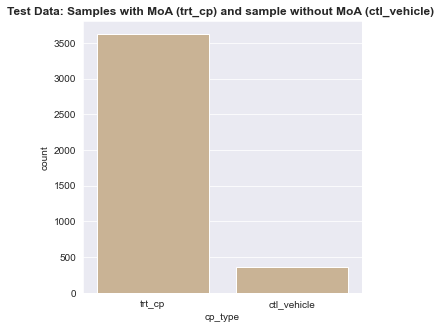

In [35]:
# cp_type
test_data.cp_type.astype("category")
plt.figure(figsize=(5,5))
sns.set_palette("tab20")
sns.countplot(test_data['cp_type'], color='tan')
plt.title("Test Data: Samples with MoA (trt_cp) and sample without MoA (ctl_vehicle) ", fontsize=12, weight='bold')
plt.show()


As we can see that cp_type is imbalanced whith high number of trt_cp, which is expected since it has MoA.
 As we know ctl_ vehcicle has no MoA, so it will of no use to us and we will discard it from our dataset for our further analysis

In [36]:
# remove ctl_vehicle from train data
test_data= test_data.drop(test_data[test_data.cp_type == "ctl_vehicle"].index)
test_data

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0     id_0004d9e33  trt_cp       24      D1 -0.5458  0.1306 -0.5135  0.4408   
1     id_001897cda  trt_cp       72      D1 -0.1829  0.2320  1.2080 -0.4522   
3     id_00276f245  trt_cp       24      D2  0.4828  0.1955  0.3825  0.4244   
4     id_0027f1083  trt_cp       48      D1 -0.3979 -1.2680  1.9130  0.2057   
6     id_006fc47b8  trt_cp       48      D2  0.3658  0.5536 -0.6898 -1.6270   
...            ...     ...      ...     ...     ...     ...     ...     ...   
3977  id_ff7004b87  trt_cp       24      D1  0.4571 -0.5743  3.3930 -0.6202   
3978  id_ff925dd0d  trt_cp       24      D1 -0.5885 -0.2548  2.5850  0.3456   
3979  id_ffb710450  trt_cp       72      D1 -0.3985 -0.1554  0.2677 -0.6813   
3980  id_ffbb869f2  trt_cp       48      D2 -1.0960 -1.7750 -0.3977  1.0160   
3981  id_ffd5800b6  trt_cp       72      D1 -0.5174  0.2953  0.3286 -0.0428   

         g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94    c-95  \
0     1.5500 -0.1644  ...  0.0981  0.7978 -0.1430 -0.2067 -0.2303 -0.1193   
1    -0.3652 -0.3319  ... -0.1190 -0.1852 -1.0310 -1.3670 -0.3690 -0.5382   
3    -0.5855 -1.2020  ...  0.1260  0.1570 -0.1784 -1.1200 -0.4325 -0.9005   
4    -0.5864 -0.0166  ...  0.4965  0.7578 -0.1580  1.0510  0.5742  1.0900   
6     0.5239 -0.3832  ... -0.8820 -0.5378  0.2314 -0.7602 -0.9982 -0.6570   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
3977  0.8557  1.6240  ... -1.1790 -0.6422 -0.4367  0.0159 -0.6539 -0.4791   
3978  0.4401  0.3107  ...  0.0210  0.5780 -0.5888  0.8057  0.9312  1.2730   
3979  0.0152  0.4791  ...  0.4418  0.9153 -0.1862  0.4049  0.9568  0.4666   
3980 -1.3350 -0.2207  ...  0.3079 -0.4473 -0.8192  0.7785  0.3133  0.1286   
3981 -0.0800  0.8702  ...  0.0363  0.1708  0.5939 -0.0507  0.2811 -0.4041   

        c-96    c-97    c-98    c-99  
0     0.0210 -0.0502  0.1510 -0.7750  
1     0.0359 -0.4764 -1.3810 -0.7300  
3     0.8131 -0.1305  0.5645 -0.5809  
4    -0.2962 -0.5313  0.9931  1.8380  
6    -0.2593 -0.2174  0.0044 -1.4650  
...      ...     ...     ...     ...  
3977 -1.2680 -1.1280 -0.4167 -0.6600  
3978  0.2614 -0.2790 -0.0131 -0.0934  
3979  0.0461  0.5888 -0.4205 -0.1504  
3980 -0.2618  0.5074  0.7430 -0.0484  
3981 -0.4948  0.0757 -0.1356  0.5280  

[3624 rows x 876 columns]

C:\Users\16476\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


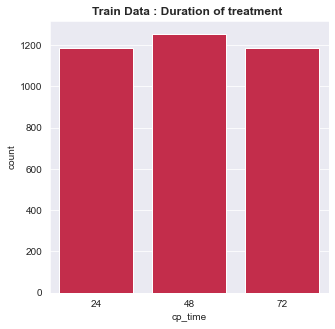

In [37]:
#cp_time
test_data.cp_time.astype("category")
plt.figure(figsize=(5,5))
sns.set_palette("tab20")
sns.countplot(test_data['cp_time'], color='crimson')
plt.title("Train Data : Duration of treatment ", fontsize=12, weight='bold')
plt.show()
# Treatment durations are pretty balanced for our dataset

C:\Users\16476\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


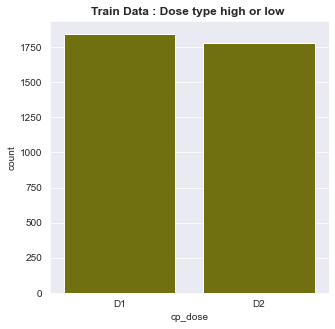

In [38]:
test_data.cp_dose.astype("category")
plt.figure(figsize=(5,5))
sns.set_palette("tab20")
sns.countplot(test_data['cp_dose'], color='olive')
plt.title("Train Data : Dose type high or low ", fontsize=12, weight='bold')
plt.show()
#Dose type are pretty balanced and evenly distributed for our dataset

# Distribution of Gene in Test data

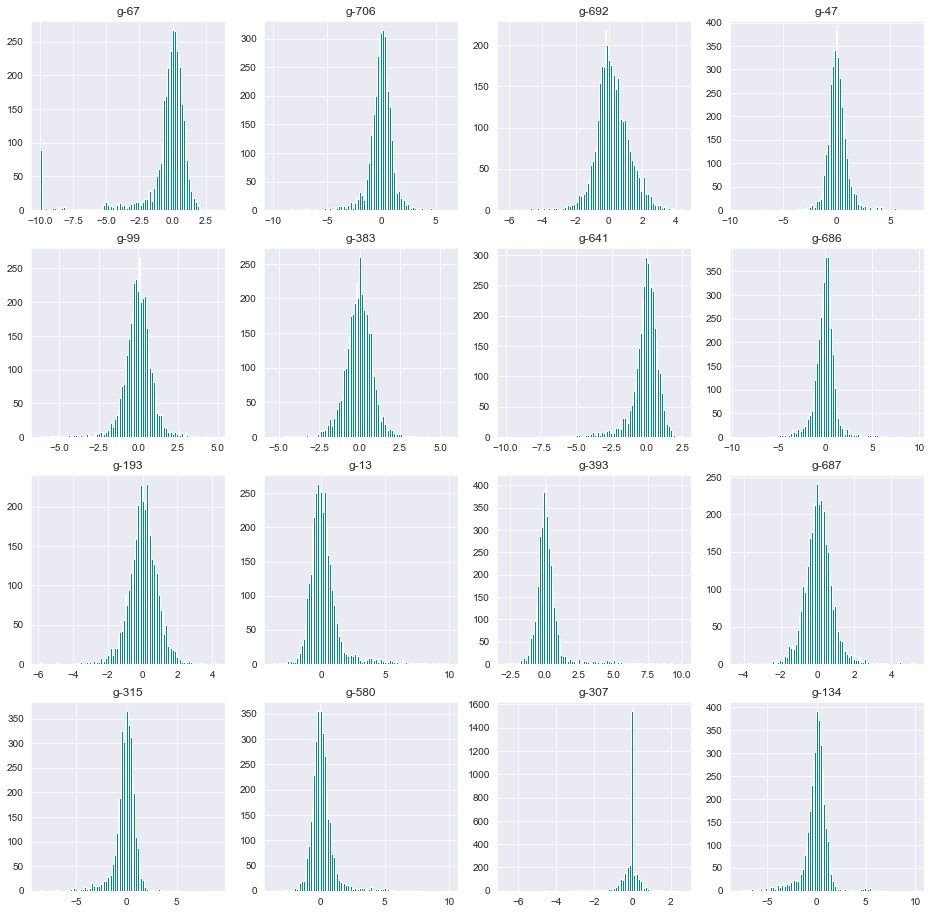

In [39]:
gene_test = [g for g in test_data.columns if g.startswith("g-")]
plt.figure(figsize=(16,16))
sns.set_style('darkgrid')
gene_distribution_test =np.random.choice(len(gene_test),16)
for i,col in enumerate(gene_distribution_test):
    plt.subplot(4,4,i+1)
    plt.hist(test_data.loc[:,gene_test[col]],bins=100,color="darkcyan")
    plt.title(gene_test[col])

From above data we can see that the range for -10 to 10. Negative value indicates gene supression and positive value indicates gene expression

# Distribution of cell viablity in Test data

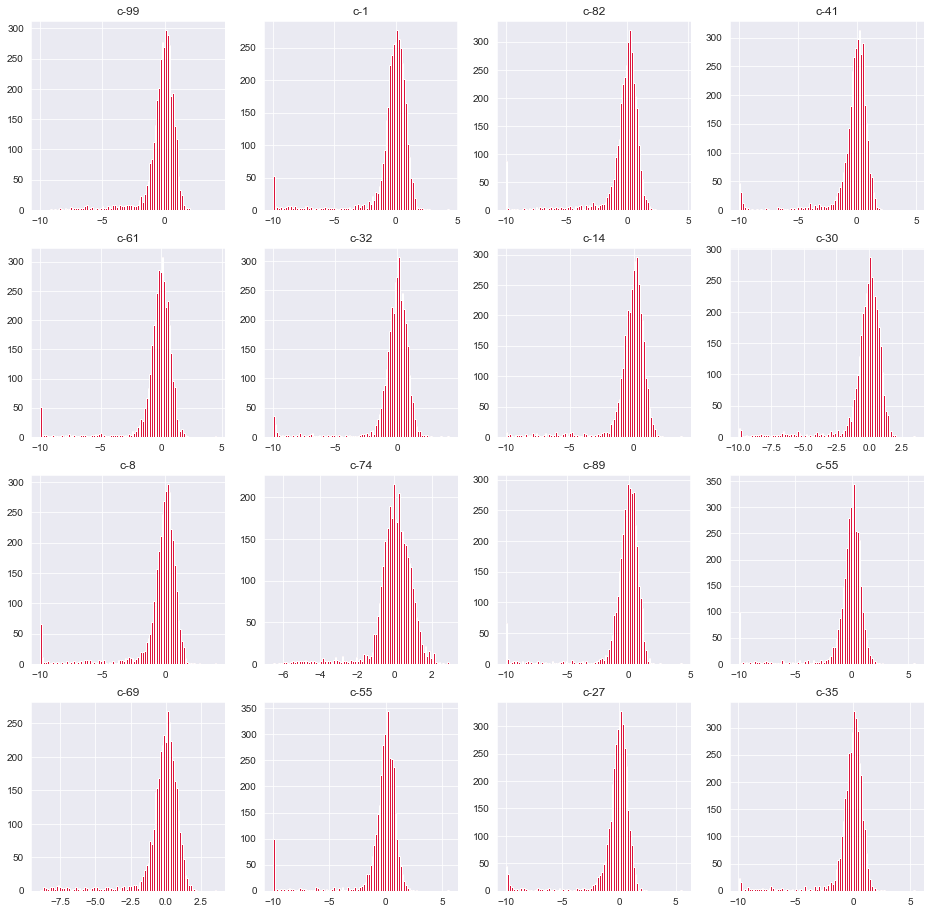

In [40]:
cell_test = [c for c in test_data.columns if c.startswith("c-")]
plt.figure(figsize=(16,16))
sns.set_style('darkgrid')
cell_distribution_test =np.random.choice(len(cell_test),16)
for i,col in enumerate(cell_distribution_test):
    plt.subplot(4,4,i+1)
    plt.hist(test_data.loc[:,cell_test[col]],bins=100,color="crimson")
    plt.title(cell_test[col])

From above data we can see that the range for -10 to 10. Negative value indicates dead cells and positive value indicates living cells.

Thus we can say that both test data and train data has gene data and cell viablity data within the range of -10 to 10.

In [41]:
gene_test = test_data.iloc[1:3624 ,4:771]
diagonal_pairs(gene_test)
print(correlations(gene_test, 10))

g-37   g-50     0.912476
g-123  g-744    0.854028
g-349  g-460    0.853764
g-50   g-672    0.852693
g-369  g-569    0.851348
g-63   g-195    0.850437
g-228  g-349    0.846350
g-195  g-228    0.844091
g-248  g-460    0.842553
g-228  g-744    0.841331
dtype: float64


In [42]:
cell_test = test_data.iloc[1:3624 ,776:876]
diagonal_pairs(cell_test)
print(correlations(cell_test, 10))

c-13  c-26    0.932057
      c-73    0.931367
c-42  c-62    0.930520
c-6   c-33    0.930135
c-38  c-94    0.928474
c-42  c-52    0.927688
c-13  c-38    0.927123
      c-94    0.926571
c-26  c-38    0.925108
c-4   c-13    0.924601
dtype: float64


From the above correlation we can conclude that both train and test data for Gene expression and cell viablity shows similar correlation

In [87]:
from sklearn.preprocessing import LabelEncoder

new_train_data = new_train_data[new_train_data['cp_type']!='ctl_vehicle']
new_train_data = pd.get_dummies(new_train_data, columns=["cp_type","cp_time","cp_dose"])


X = new_train_data.iloc[:,1:880]

y = new_train_data.iloc[:,880:]

y_no_hot_encoding=pd.get_dummies(y).idxmax(1)
lblEncoder = LabelEncoder()
y_encoded = lblEncoder.fit_transform(y_no_hot_encoding)
X

g-0     g-1     g-2     g-3     g-4     g-5     g-6     g-7     g-8  \
0      1.0620  0.5577 -0.2479 -0.6208 -0.1944 -1.0120 -1.0220 -0.0326  0.5548   
1      0.0743  0.4087  0.2991  0.0604  1.0190  0.5207  0.2341  0.3372 -0.4047   
2      0.6280  0.5817  1.5540 -0.0764 -0.0323  1.2390  0.1715  0.2155  0.0065   
3     -0.5138 -0.2491 -0.2656  0.5288  4.0620 -0.8095 -1.9590  0.1792 -0.1321   
4     -0.3254 -0.4009  0.9700  0.6919  1.4180 -0.8244 -0.2800 -0.1498 -0.8789   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
21943  0.1608 -1.0500  0.2551 -0.2239 -0.2431  0.4256 -0.1166 -0.1777 -0.7480   
21944  0.1394 -0.0636 -0.1112 -0.5080 -0.4713  0.7201  0.5773  0.3055 -0.4726   
21945 -1.3260  0.3478 -0.3743  0.9905 -0.7178  0.6621 -0.2252 -0.5565  0.5112   
21946  0.6660  0.2324  0.4392  0.2044  0.8531 -0.0343  0.0323  0.0463  0.4299   
21947 -0.8598  1.0240 -0.1361  0.7952 -0.3611 -3.6750 -1.2420  0.9146  3.0790   

          g-9  ...    c-97    c-98    c-99  5-alpha_reductase_inhibitor  \
0     -0.0921  ...  0.2139  0.3801  0.4176                            0   
1      0.8507  ...  0.1241  0.6077  0.7371                            0   
2      1.2300  ... -0.2187 -1.4080  0.6931                            0   
3     -1.0600  ... -0.8784 -0.3876 -0.8154                            0   
4      0.8630  ...  0.2885 -0.3786  0.7125                            0   
...       ...  ...     ...     ...     ...                          ...   
21943  0.1368  ...  0.8413 -0.4259  0.2434                            0   
21944  0.1269  ...  0.9171  0.5258  0.4680                            0   
21945  0.6727  ... -0.1224 -0.2715  0.3689                            0   
21946 -0.7985  ...  0.7015 -0.6290  0.0740                            0   
21947  1.2460  ... -0.4775 -2.1500 -4.2520                            0   

       11-beta-hsd1_inhibitor  acat_inhibitor  acetylcholine_receptor_agonist  \
0                           0               0                               0   
1                           0               0                               0   
2                           0               0                               0   
3                           0               0                               0   
4                           0               0                               0   
...                       ...             ...                             ...   
21943                       0               0                               0   
21944                       0               0                               0   
21945                       0               0                               0   
21946                       0               0                               0   
21947                       0               0                               0   

       acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   
...                                  ...                             ...   
21943                                  0                               0   
21944                                  0                               0   
21945                                  0                               0   
21946                                  0                               0   
21947                                  0                               0   

       adenosine_receptor_agonist  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0  
...                           ... 

# PCA and Logistic regression

In [88]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

pca_df = pd.DataFrame(columns=['n_component', 'accuracy'])

for comp in range(2,50):
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)

  pca = PCA(n_components=comp)
  X_pca = pca.fit_transform(X_scaled)
  X_pca.shape

  X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)

  lr = OneVsRestClassifier(LogisticRegression(max_iter=300))
  lr = lr.fit(X_train, y_train)
  y_pred = lr.predict(X_test)
  
  new_row = {'n_component':comp, 'accuracy': accuracy_score(y_test, y_pred)}
  #append row to the dataframe
  pca_df = pca_df.append(new_row, ignore_index=True)
  print(new_row)
  
 

{'n_component': 2, 'accuracy': 0.39954441913439637}
{'n_component': 3, 'accuracy': 0.4002277904328018}
{'n_component': 4, 'accuracy': 0.4006833712984055}
{'n_component': 5, 'accuracy': 0.4052391799544419}
{'n_component': 6, 'accuracy': 0.4079726651480638}
{'n_component': 7, 'accuracy': 0.41252847380410024}
{'n_component': 8, 'accuracy': 0.41594533029612757}
{'n_component': 9, 'accuracy': 0.4195899772209567}
{'n_component': 10, 'accuracy': 0.42528473804100225}
{'n_component': 11, 'accuracy': 0.42870159453302964}
{'n_component': 12, 'accuracy': 0.43211845102505697}
{'n_component': 13, 'accuracy': 0.4343963553530752}
{'n_component': 14, 'accuracy': 0.4348519362186788}
{'n_component': 15, 'accuracy': 0.43644646924829156}
{'n_component': 16, 'accuracy': 0.4382687927107061}
{'n_component': 17, 'accuracy': 0.4421412300683371}
{'n_component': 18, 'accuracy': 0.44624145785876995}
{'n_component': 19, 'accuracy': 0.44943052391799543}
{'n_component': 20, 'accuracy': 0.45056947608200454}
{'n_compon

# Logistic Regression with cross validation

In [95]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

lr = OneVsRestClassifier(LogisticRegression(max_iter=300))
cv_results = cross_validate(lr, X_pca, y_encoded, cv=10)


C:\Users\16476\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [96]:

cv_results['test_score'].mean()

0.4464643062566577